In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('fivethirtyeight')
np.random.seed(365)
import pickle
import seaborn as sns

## Exploratory Data Analysis

##### import the cleaned data

Let's see how our data looks!

First, we have Janauary dataset that has every observations with Pick up location information, tip amount, total amount and trip distance information

In [11]:
jan_df = pickle.load(open('./data/pickled/alldata_2020_01.pkl','rb'))
# jan_df.drop(columns=['Unnamed: 0'], inplace=True)
jan_df = jan_df[jan_df['Borough']!='nan']
jan_df.head()

,pickup_time,PULocationID,tip_amount,total_amount,trip_distance,Borough
17393,2020-01-01 00:00:00,48,0.00,10.30,1.43,Manhattan
17395,2020-01-01 00:00:00,48,0.00,12.30,1.35,Manhattan
8483,2020-01-01 00:00:00,68,2.85,17.15,2.20,Manhattan
53166,2020-01-01 00:00:00,68,0.00,9.30,0.96,Manhattan
44225,2020-01-01 00:00:00,144,0.00,22.30,5.44,Manhattan


#### I will import 2nd dataset that consists of original dataset with changed locationid

In [12]:
time_jan_df = pickle.load(open('./data/pickled/ts_2020_01.pkl','rb'))

time_jan_df.head()

,count
pickup_time,
2020-01-01 00:00:00,13240
2020-01-01 01:00:00,15061
2020-01-01 02:00:00,13540
2020-01-01 03:00:00,9830
2020-01-01 04:00:00,6218


In [13]:
time_jan_df.dtypes

count    int64
dtype: object

### Show the hourly pickups in NYC

In [194]:
pivoted_jan = time_jan_df[['count']].pivot_table(index=time_jan_df.index.date, columns=time_jan_df.index.hour)
pivoted_jan = pivoted_jan.fillna(0)
pivoted_jan.head()

count                                                          \
pickup_time     0      1      2     3     4     5     6     7     8     9    
2020-01-01   13240  15061  13540  9830  6218  2749  2211  2365  2314  3218   
2020-01-02    2312   1210    773   569   758  1579  3660  5899  7507  8023   
2020-01-03    3398   2173   1255   991   997  1585  3912  6338  8712  9443   
2020-01-04    6655   5343   3863  2845  1666  1165  1688  2847  4144  6460   
2020-01-05    8392   6837   5500  3736  2293  1195  1596  2342  3997  6145   

             ...                                                          \
pickup_time  ...     14     15     16     17     18     19     20     21   
2020-01-01   ...   8487   8630   8393   8399   8324   7381   6206   6047   
2020-01-02   ...  10682  10989  10311  10927  11303   9726   8325   8413   
2020-01-03   ...  10974  10733  10546  11543  12171  11925   9611  10510   
2020-01-04   ...   9731  10630  10795  11118  11202  11548  10252  11942   
2020-01-05   ...  10573  10615  10901  10665   9822   8386   7373   6512   

                           
pickup_time     22     23  
2020-01-01    5297   3940  
2020-01-02    7031   5049  
2020-01-03   10197   8279  
2020-01-04   11231  10646  
2020-01-05    4889   3872  

[5 rows x 24 columns]

### Visualization

This is to see the distribution of the number of pickups in New York City for a month

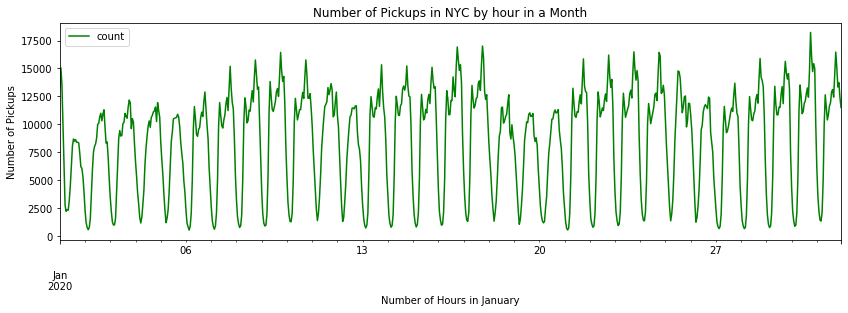

In [14]:
fig, ax = plt.subplots(figsize = (14,4))
time_jan_df.plot(ax=ax, color='g')
plt.xlabel('Number of Hours in January')
plt.ylabel('Number of Pickups')
plt.title('Number of Pickups in NYC by hour in a Month');

We can see that there is flutuations throughout. Let's see if we can see by week and day to see which days/hours are more popular and which are less popular

##### Weekly:

Let's see how it looks for the first week of January

In [18]:
jan_first_week = time_jan_df.iloc[:168].reset_index(drop=True)
jan_second_week = time_jan_df.iloc[168:336].reset_index(drop=True)
jan_third_week = time_jan_df.iloc[336:504].reset_index(drop=True)
jan_fourth_week = time_jan_df.iloc[504:672].reset_index(drop=True)
jan_fifth_week = time_jan_df.iloc[672:].reset_index(drop=True)

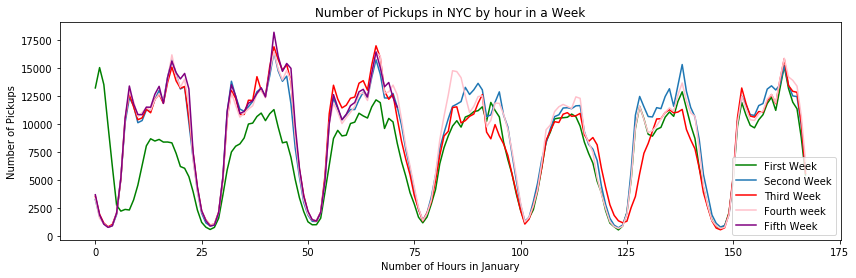

In [208]:
fig, ax = plt.subplots(figsize = (14,4))
jan_first_week.plot(ax=ax, color='g', label='First Week')
jan_second_week.plot(ax=ax)
jan_third_week.plot(ax=ax, color='r')
jan_fourth_week.plot(ax=ax, color='pink')
jan_fifth_week.plot(ax=ax, color='purple')
plt.xlabel('Number of Hours in January')
plt.ylabel('Number of Pickups')
plt.legend(['First Week', 'Second Week', 'Third Week', 'Fourth week', 'Fifth Week'])
plt.title('Number of Pickups in NYC by hour in a Week');

We can see here that every day of the week seems very simliar except for the first week of January which is the green line. But it does get to similiar as other weeks as days go by possibly because January 1st is the New Year and companies are off during holiday season.

#### Distribution of time in the day

Let's what time during the week will be the hot time for cab pick up. Here I will use the Weds of third week in January as an example

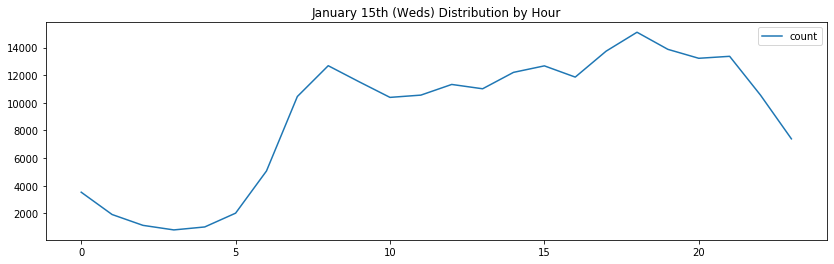

In [21]:
fig, ax = plt.subplots(figsize = (14,4))
jan_third_week.iloc[:24].plot(ax=ax);
plt.title('January 15th (Weds) Distribution by Hour');

In [23]:
jan_third_week[:24]['count'].max()

15107

In [24]:
jan_third_week[jan_third_week['count'].eq(15107)]

,count
18,15107


We can see from our visualization that at hour 18 is when the pickups are around 15107 which is at 6PM. This is due to people probably ending work and going home. Also, can see that starting around 5-8AM is when the number of pickups increase and stay around that number until the pickup so we know that taxi drivers are most needed from 7AM to 10PM.

#### Boroughs:

In [27]:
len(jan_df[jan_df['Borough'].eq('Manhattan')])

5845915

In [30]:
jan_df['Borough'].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

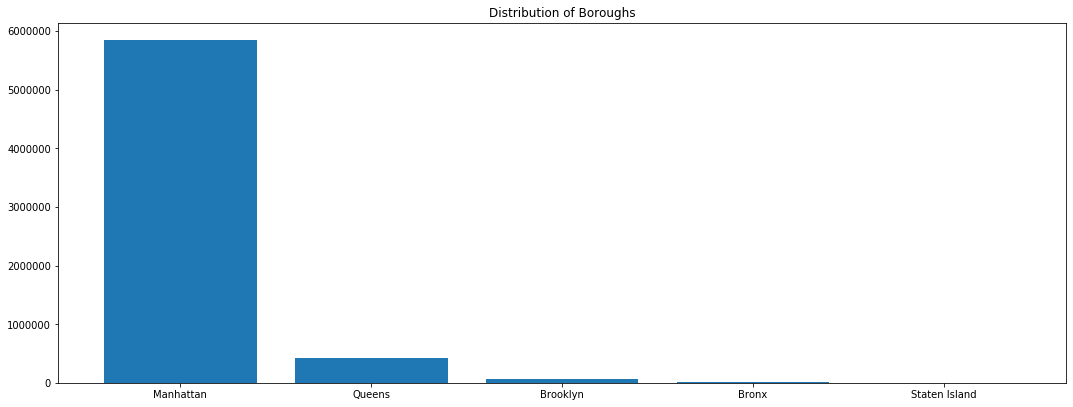

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 5))
ax = fig.add_axes([0,0,1,1])
x = jan_df['Borough'].unique()
y = [len(jan_df[jan_df['Borough'].eq('Manhattan')]), len(jan_df[jan_df['Borough'].eq('Queens')]), len(jan_df[jan_df['Borough'].eq('Brooklyn')]), len(jan_df[jan_df['Borough'].eq('Bronx')]), len(jan_df[jan_df['Borough'].eq('Staten Island')])]
plt.title('Distribution of Boroughs')
ax.bar(x,y);

In the beginning, I was surprised at how much more pickups are located in Manhattan than any other boroughs. But this made sense as the dataset consists of only yellow cabs. If I had included green cabs dataset, I would get more diverse boroughs as their pick up location. 

### Trends:

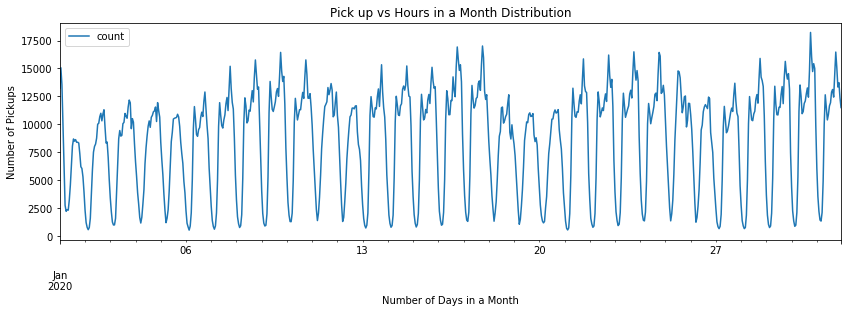

In [40]:
fig, ax = plt.subplots(figsize = (14,4))
time_jan_df[['count']].plot(ax=ax)
# cleaned_jan_df_diff_1[['count']].plot(ax=ax, color='g')

ax.set_xlabel('Number of Days in a Month')
ax.set_ylabel('Number of Pickups')
plt.title('Pick up vs Hours in a Month Distribution');


There is no apparent trend but I will check by using Dickey-Fuller test to see if our data is stationary or not.

In [41]:
## CHECK TO SEE IF OUR DATA IS STATINONARY
from statsmodels.tsa.stattools import adfuller
ad_test = adfuller(time_jan_df['count'])
print('ADF Statistic: %f' % ad_test[0])
print('p-value: %f' % ad_test[1])
print('Critical Values:')
for key, value in ad_test[4].items():
    print('\t%s: %.3f' % (key, value))
print('number of observations used:', ad_test[3])
print('lags used:', ad_test[2])

ADF Statistic: -3.242465
p-value: 0.017655
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569
number of observations used: 723
lags used: 20


We can see here that our p-value is less than our alpha value and also test statistic is less than the critical value, so we fail to reject the null hypothesis. (null hypothesis is the data is not stationary)

Let's see what happens when we difference this.

In [53]:
diff_1_time_jan_df = time_jan_df.diff(periods=1)
diff_1_time_jan_df

,count
pickup_time,
2020-01-01 00:00:00,NaN
2020-01-01 01:00:00,1821.0
2020-01-01 02:00:00,-1521.0
2020-01-01 03:00:00,-3710.0
2020-01-01 04:00:00,-3612.0
...,...
2020-01-31 19:00:00,-1402.0
2020-01-31 20:00:00,-1728.0
2020-01-31 21:00:00,389.0


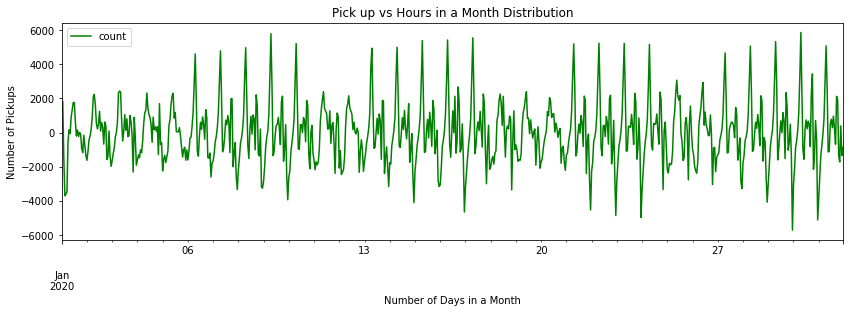

In [57]:
fig, ax = plt.subplots(figsize = (14,4))
# time_jan_df[['count']].plot(ax=ax)
diff_1_time_jan_df[['count']].plot(ax=ax, color='g')

ax.set_xlabel('Number of Days in a Month')
ax.set_ylabel('Number of Pickups')
plt.title('Pick up vs Hours in a Month Distribution');


In [59]:
## CHECK TO SEE IF OUR DATA IS STATINONARY
from statsmodels.tsa.stattools import adfuller
ad_test = adfuller(diff_1_time_jan_df['count'][1:])
print('ADF Statistic: %f' % ad_test[0])
print('p-value: %f' % ad_test[1])
print('Critical Values:')
for key, value in ad_test[4].items():
    print('\t%s: %.3f' % (key, value))
print('number of observations used:', ad_test[3])
print('lags used:', ad_test[2])

ADF Statistic: -19.411639
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569
number of observations used: 722
lags used: 20


After differencing, we got an even lower p-value of 0 and the graph looks more stationary in terms of visualizing the data. We can see in the beginning of January, we have seasonality as the number of pickups do not fluctuate as much. And the ones that are fluctuating more tend to be on weekdays when people have work so we see five distinguishable jumps every week and then two days are for weekend when people are home alot more than going out.

### TRAIN TEST SPLIT.

In [63]:
time_jan_df

,count
pickup_time,
2020-01-01 00:00:00,13240
2020-01-01 01:00:00,15061
2020-01-01 02:00:00,13540
2020-01-01 03:00:00,9830
2020-01-01 04:00:00,6218
...,...
2020-01-31 19:00:00,15067
2020-01-31 20:00:00,13339
2020-01-31 21:00:00,13728


In [77]:
# STEP 2: split into train and test sets
time_jan_df.loc[:, ['count']].reset_index()['count']
train_ = time_jan_df.loc[:, ['count']].reset_index()['count'][:int(len(time_jan_df)*.7)]
test_ = time_jan_df.loc[:, ['count']].reset_index()['count'][int(len(time_jan_df)*.7):]


### ACF AND PACF

Now we can see our acf and pacf graph here.

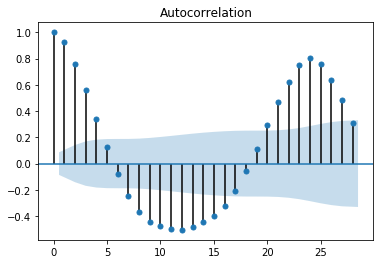

In [81]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train_, alpha=.05);

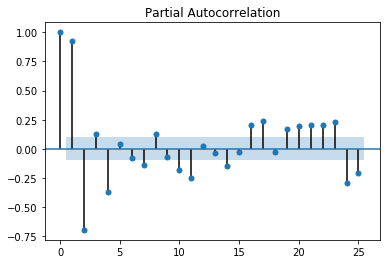

In [83]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train_, alpha=.025, lags=25);

### Model

Baseline Model: Moving Average

                            count
pickup_time                      
2020-01-01 00:00:00           NaN
2020-01-01 01:00:00           NaN
2020-01-01 02:00:00  13947.000000
2020-01-01 03:00:00  12810.333333
2020-01-01 04:00:00   9862.666667
2020-01-01 05:00:00   6265.666667
2020-01-01 06:00:00   3726.000000
2020-01-01 07:00:00   2441.666667
2020-01-01 08:00:00   2296.666667
2020-01-01 09:00:00   2632.333333


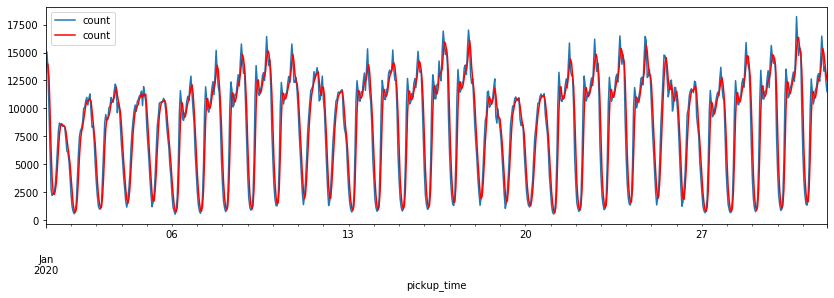

In [182]:
# Tail-rolling average transform
rolling = time_jan_df.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

fig, ax = plt.subplots(figsize = (14,4))
# plot original and transformed dataset
time_jan_df.plot(ax=ax, label='original')
rolling_mean.plot(ax=ax, color='red', label='moving average')
plt.legend()
plt.show()

In [189]:
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = time_jan_df
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
mse_error = mean_squared_error(test, predictions)



predicted=13947.000000, expected=9830.000000
predicted=12810.333333, expected=6218.000000
predicted=9862.666667, expected=2749.000000
predicted=6265.666667, expected=2211.000000
predicted=3726.000000, expected=2365.000000
predicted=2441.666667, expected=2314.000000
predicted=2296.666667, expected=3218.000000
predicted=2632.333333, expected=4539.000000
predicted=3357.000000, expected=6302.000000
predicted=4686.333333, expected=8057.000000
predicted=6299.333333, expected=8689.000000
predicted=7682.666667, expected=8487.000000
predicted=8411.000000, expected=8630.000000
predicted=8602.000000, expected=8393.000000
predicted=8503.333333, expected=8399.000000
predicted=8474.000000, expected=8324.000000
predicted=8372.000000, expected=7381.000000
predicted=8034.666667, expected=6206.000000
predicted=7303.666667, expected=6047.000000
predicted=6544.666667, expected=5297.000000
predicted=5850.000000, expected=3940.000000
predicted=5094.666667, expected=2312.000000
predicted=3849.666667, expecte

In [214]:
print(f'Test MSE: {mse_error}, RMSE:{np.sqrt(mse_error)}')


Test MSE: 8477361.061778378, RMSE:2911.5908129025233


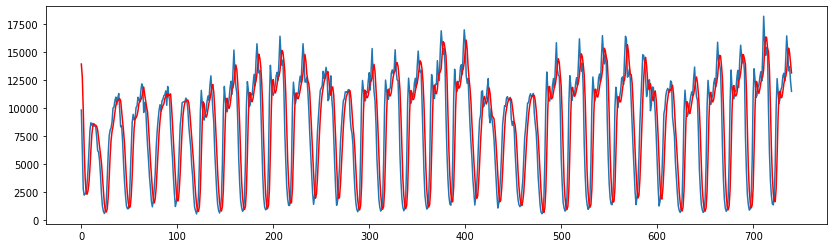

In [212]:
fig, ax =  plt.subplots(figsize=(14,4))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

It's not very clear from the graph above so let's look at the zoomed graph of first 100 hours

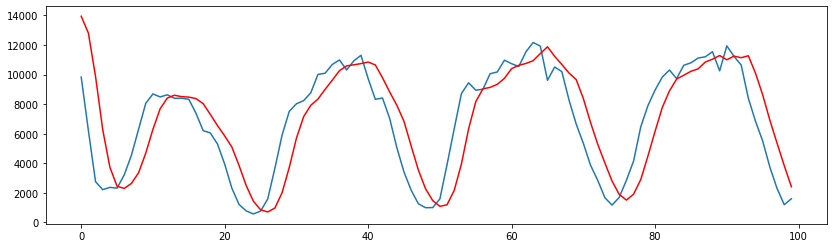

In [213]:
fig, ax =  plt.subplots(figsize=(14,4))
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()

Looking at the first 100 hour,  we can see there is some lag. 

In [164]:
!pip install sktime

     |████████████████████████████████| 4.3 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 14.9 MB/s eta 0:00:01
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.11.0
    Uninstalling statsmodels-0.11.0:
      Successfully uninstalled statsmodels-0.11.0


## Naive Forecast Model

In [169]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss, mase_loss
from sktime.forecasting.naive import NaiveForecaster

y_train, y_test = temporal_train_test_split(time_jan_df['count'])  
fh = np.arange(1, len(y_test) + 1)  # forecasting horizon
forecaster = NaiveForecaster(strategy="last")  # random walk 
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
print(smape_loss(y_test, y_pred), mase_loss(y_test, y_pred, y_train))


1.1466442508757624 5.755780601711866


#### ARIMA #1

In [97]:
### ARIMA MODEL ####
from statsmodels.tsa.arima_model import ARIMA
#fit ARIMA model (3,1,0))
## P = Order of AR, D = order of MA, 
model = ARIMA(train_[:-1], order=(4,1,2)) 
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                  518
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -4360.190
Method:                       css-mle   S.D. of innovations           1089.810
Date:                Wed, 04 Nov 2020   AIC                           8736.381
Time:                        05:46:37   BIC                           8770.380
Sample:                             1   HQIC                          8749.702
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.0003     13.206      0.379      0.705     -20.883      30.884
ar.L1.D.count     2.4646      0.045     54.762      0.000       2.376       2.553
ar.L2.D.count    -2.3586      0.107    -

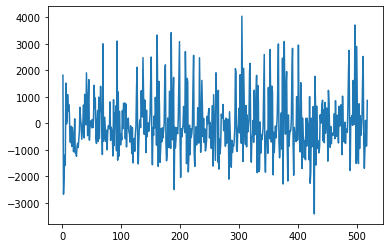

In [100]:
model_fit.resid.plot()

In [114]:
forecast = model_fit.forecast()[0]
forecast

array([12974.9934659])

In [115]:
test_

520    12046
521    14019
522    16201
523    14367
524    13309
       ...  
739    15067
740    13339
741    13728
742    12380
743    11503
Name: count, Length: 224, dtype: int64

In [118]:
test_

520    12046
521    14019
522    16201
523    14367
524    13309
       ...  
739    15067
740    13339
741    13728
742    12380
743    11503
Name: count, Length: 224, dtype: int64

In [132]:
predictions = model_fit.predict(start=test_.index[1], end=test_.index[243])


IndexError: index 243 is out of bounds for axis 0 with size 224

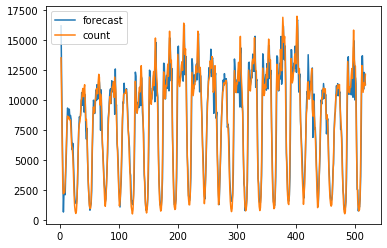

In [104]:
model_fit.plot_predict();

In [122]:
#### ARIMA #2

In [198]:
### ARIMA MODEL ####
from statsmodels.tsa.arima_model import ARIMA
#fit ARIMA model (3,1,0))
## P = Order of AR, D = order of MA, 
model = ARIMA(time_jan_df[:-1], order=(4,1,1)) 
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                  742
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -6282.468
Method:                       css-mle   S.D. of innovations           1145.345
Date:                Wed, 04 Nov 2020   AIC                          12578.936
Time:                        07:55:32   BIC                          12611.201
Sample:                    01-01-2020   HQIC                         12591.375
                         - 01-31-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7631      1.252      2.207      0.027       0.309       5.217
ar.L1.D.count     1.6885      0.034     49.916      0.000       1.622       1.755
ar.L2.D.count    -1.2235      0.065    -

In [199]:
arima_rmse_2= np.sqrt(np.mean(model_fit.resid**2))
print('RMSE for ARIMA2:', arima_rmse_2)

RMSE for ARIMA2: 1151.3884466556217


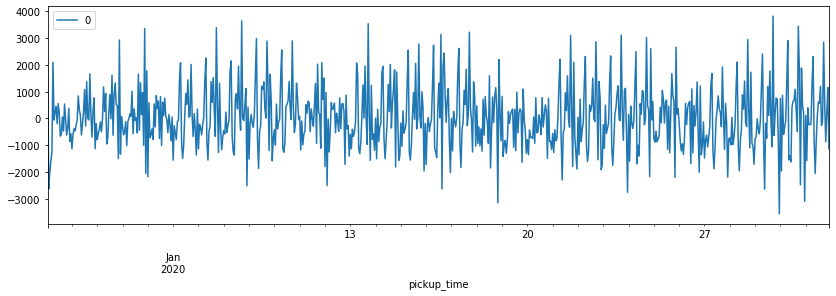

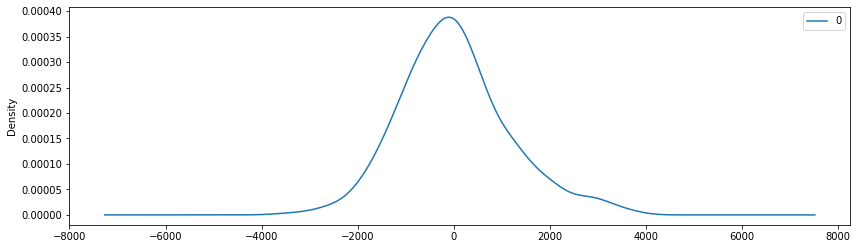

                 0
count   742.000000
mean     17.938537
std    1152.025257
min   -3569.330604
25%    -748.233812
50%     -60.093818
75%     612.419030
max    3823.991857


In [200]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(14,4))
plt.show()
residuals.plot(kind='kde', figsize=(14, 4))
plt.show()
print(residuals.describe())

Result shows that there is a bias in the prediction as there is a non-zero mean in the residuals.

In [201]:
fc, se, conf = model_fit.forecast(alpha=0.05)
fc, se, conf

(array([9986.61921728]),
 array([1145.34506391]),
 array([[ 7741.78414215, 12231.45429241]]))

In [202]:
length = int(len(time_jan_df) * 0.70)
train_, test_ = time_jan_df[1:length], time_jan_df[length:]

In [203]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

# pd.DataFrame(forecast_accuracy(fc, test_))

In [204]:
model_fit.predict()

pickup_time
2020-01-01 01:00:00       2.763051
2020-01-01 02:00:00    1121.048562
2020-01-01 03:00:00   -1692.451178
2020-01-01 04:00:00   -2028.430051
2020-01-01 05:00:00   -2186.735271
                          ...     
2020-01-31 18:00:00    1361.493195
2020-01-31 19:00:00    -524.933943
2020-01-31 20:00:00   -1935.548882
2020-01-31 21:00:00    -764.970373
2020-01-31 22:00:00    -208.184136
Freq: H, Length: 742, dtype: float64

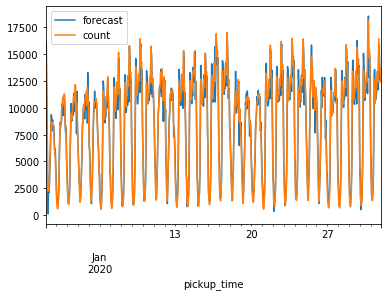

In [205]:
model_fit.plot_predict();

## Facebook Prophet

In [144]:
fb_df = time_jan_df.reset_index()
fb_df.rename(columns={'pickup_time': 'ds', 'count': 'y'}, inplace=True)
fb_df

,ds,y
0,2020-01-01 00:00:00,13240
1,2020-01-01 01:00:00,15061
2,2020-01-01 02:00:00,13540
3,2020-01-01 03:00:00,9830
4,2020-01-01 04:00:00,6218
...,...,...
739,2020-01-31 19:00:00,15067
740,2020-01-31 20:00:00,13339
741,2020-01-31 21:00:00,13728
742,2020-01-31 22:00:00,12380


In [147]:
## facebook prophet
from fbprophet import Prophet

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.fit(fb_df.reset_index())

In [148]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
output = forecast.tail(366)
output

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
408,2020-01-18 00:00:00,11267.426288,4070.271602,9317.029521,11267.426288,11267.426288,-4405.395112,-4405.395112,-4405.395112,-2727.428185,...,696.947400,696.947400,696.947400,-2374.914327,-2374.914327,-2374.914327,0.0,0.0,0.0,6862.031176
409,2020-01-18 01:00:00,11265.121156,2802.353121,7881.879353,11265.121156,11265.121156,-5955.041626,-5955.041626,-5955.041626,-4250.921776,...,671.387112,671.387112,671.387112,-2375.506961,-2375.506961,-2375.506961,0.0,0.0,0.0,5310.079531
410,2020-01-18 02:00:00,11262.816024,1153.299430,6403.464034,11262.816024,11262.816024,-7524.252323,-7524.252323,-7524.252323,-5793.410875,...,645.269163,645.269163,645.269163,-2376.110612,-2376.110612,-2376.110612,0.0,0.0,0.0,3738.563701
411,2020-01-18 03:00:00,11260.510893,-190.103063,5017.742685,11260.510893,11260.510893,-8791.368589,-8791.368589,-8791.368589,-7033.210082,...,618.566278,618.566278,618.566278,-2376.724784,-2376.724784,-2376.724784,0.0,0.0,0.0,2469.142304
412,2020-01-18 04:00:00,11258.205761,-481.224758,4842.546149,11258.205761,11258.205761,-9122.526765,-9122.526765,-9122.526765,-7336.410121,...,591.232339,591.232339,591.232339,-2377.348984,-2377.348984,-2377.348984,0.0,0.0,0.0,2135.678996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,2020-02-26 23:00:00,9058.177929,5591.471528,10947.588984,9058.005876,9058.352407,-717.300347,-717.300347,-717.300347,-1152.009963,...,197.751747,197.751747,197.751747,236.957870,236.957870,236.957870,0.0,0.0,0.0,8340.877582
770,2020-02-27 23:00:00,9002.890706,5950.407657,11444.552705,9002.710545,9003.076427,-303.492656,-303.492656,-303.492656,-1152.009963,...,923.243241,923.243241,923.243241,-74.725934,-74.725934,-74.725934,0.0,0.0,0.0,8699.398050
771,2020-02-28 23:00:00,8947.603484,5578.292681,10850.243839,8947.411754,8947.802587,-790.942617,-790.942617,-790.942617,-1152.009963,...,721.957743,721.957743,721.957743,-360.890397,-360.890397,-360.890397,0.0,0.0,0.0,8156.660867
772,2020-02-29 23:00:00,8892.316261,4421.584095,9503.681896,8892.112610,8892.527133,-1949.163472,-1949.163472,-1949.163472,-1152.009963,...,-182.452161,-182.452161,-182.452161,-614.701347,-614.701347,-614.701347,0.0,0.0,0.0,6943.152789


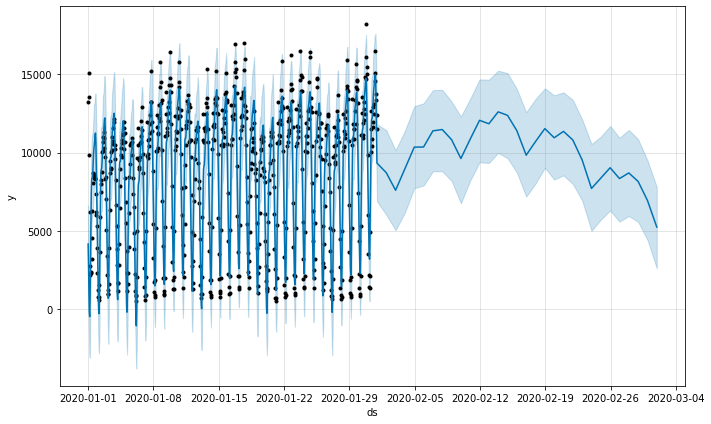

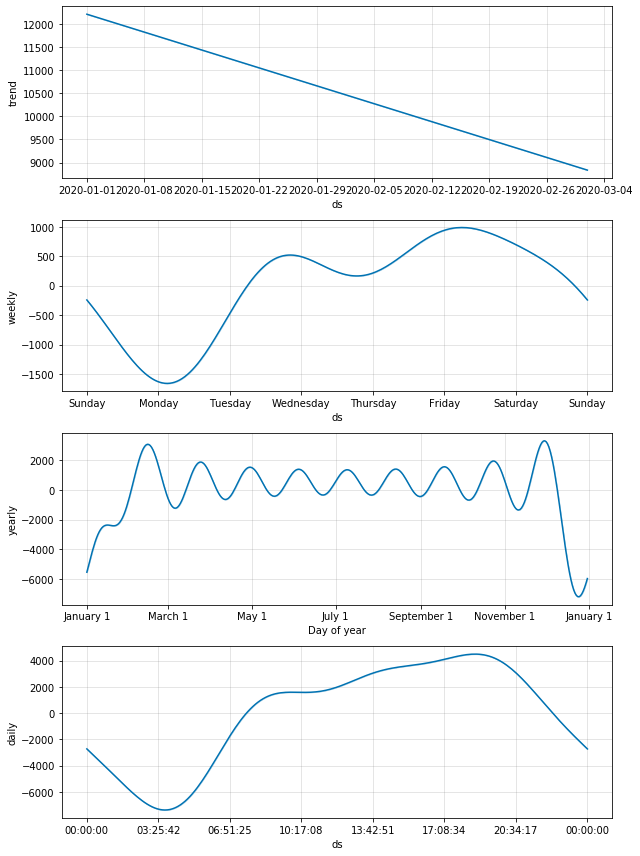

In [149]:
# Plot results
# Plot the fit to past data and future forecast.
fig1 = model.plot(forecast)
 
# Plot breakdown of components.
fig2 = model.plot_components(forecast) 
plt.show()

In [161]:
se = np.square(forecast.loc[:, 'yhat'] - fb_df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
print('MSE:', mse, 'rmse:', rmse)

MSE: 4244757.410080095 rmse: 2060.2809056243022


## Adding Boroughs

## Adding Exogenous Variable: Weather